In [6]:
# HOW PRIVATE OUR SNPs ARE?
require(compiler)
require(RSpectra)

setMKLthreads(16)
#setwd('ag1000g_phase2/learning')
load('Haplotype_16Filtered.RData')
ls()

[1] "fsum"      "gc2"       "haplotype" "i"         "label"     "M"        
[7] "pop"       "POS"       "s"

In [7]:
# JUST SOME FUNCTIONS
fsum<-function(x) {.Primitive('sum')(x)}
gc2<-function() {invisible(gc())}

In [8]:
# REMOVE SOME POPULATIONS
s<-!(label %in% c('GQgam', 'GHgam', 'GNcol'))
haplotype<-haplotype[s,]
label<-label[s]
dim(haplotype)
mode(haplotype)<-'numeric'
rm(s); gc2()

[1]   2234 117461

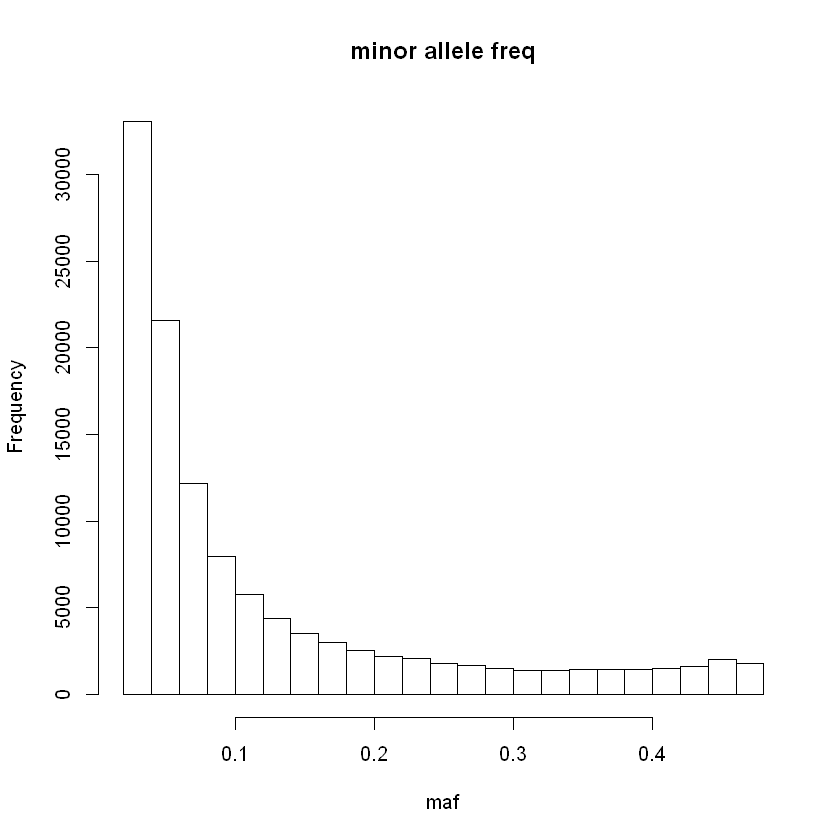

In [11]:
# GLOBAL MAF
maf<-apply(haplotype, 2, fsum)/(2*nrow(haplotype))
maf[maf>0.5]<-1-maf[maf>0.5]
hist(maf, main='minor allele freq')

In [9]:
# FIND UNIQUE LABELS AS POPULAITON
pop<-unique(label)
pop
# CREATE MATRIX TO STORE ALL THE ALLELE FREQ
M<-matrix(nc=ncol(haplotype), nr=length(pop))
# CALCULATE ALLELE FREQ FOR EACH POPULATION
for (i in 1:length(pop))
    {
    s<-(label==pop[i])
    print(pop[i])
    temp_haplotype<-haplotype[s,]
    # FOR EACH LOCUS
    M[i,]<-apply(temp_haplotype, 2, fsum)/(2*nrow(temp_haplotype))
    }

[1] "BFcol" "BFgam" "AOcol" "CIcol" "CMgam" "FRgam" "GAgam" "GHcol" "GM"   
[10] "GNgam" "GW"    "KE"    "UGgam"

[1] "BFcol"
[1] "BFgam"
[1] "AOcol"
[1] "CIcol"
[1] "CMgam"
[1] "FRgam"
[1] "GAgam"
[1] "GHcol"
[1] "GM"
[1] "GNgam"
[1] "GW"
[1] "KE"
[1] "UGgam"


[1] 117461

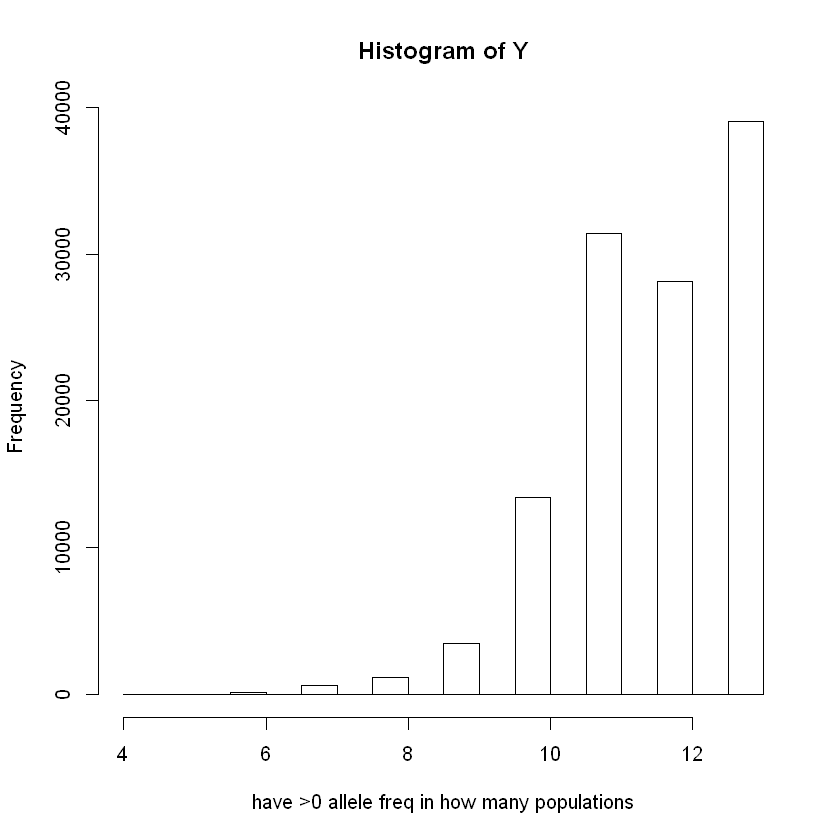

In [14]:
# Y IS VECTOR STORING IN HOW MANY POPULATIONS (OUT OF 13) THE SNP IS POLYMORPHIC
Y<-apply(M, 2, function(x) {sum(x>0)})
length(Y)
hist(Y, xlab='have >0 allele freq in how many populations')

In [15]:
# NUMBER OF SNPS THAT IS POLYMORPHIC IN ALL 13 POPULATIONS
sum(Y==13)

[1] 39038

In [16]:
# ANY VERY PRIVATE ONES?
sum(Y==1)

[1] 0